In [5]:
# IMPORTING NECESSARY LIBRARIES

#For document
import docx
from docx import Document
from docx.shared import Inches

#For function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #To read Excel File
import csv #To write as csv file
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [27]:
# DEFINING OUR FUNCTION

#Names
#excel_name = 'Data/Glucose W4 no Omics.xlsx'
#output_name = 'Glucose W4 UwnO.csv'
#target_name = 'Glucose'

def mse_images(excel_name,target_name,output_name,extension):
    #Loading the data
    dataset = pd.read_excel(excel_name)
    dataset = np.asarray(dataset)
    
    #Separating data by data, target, feature_names
    feature_names = dataset[0,2:(dataset.shape[1] - 1)] # all variables except for target variable and ID
    target = dataset[1:74,(dataset.shape[1] - 1)] # target variable...what we're trying to predict
    data = dataset[1:74,2:(dataset.shape[1] - 1)] # missing target, ID,  feature_names
    
    #Randomizing target & data and placing them in y & x respectively
    X, y = shuffle(data, target, random_state=13)
    X = X.astype(np.float32)
    y = y.astype(np.float32)
    
    #Splitting data into the trainning vs. testing set
    cutoff = int(X.shape[0] * 0.9)
    X_train, y_train = X[:cutoff], y[:cutoff]
    X_test, y_test = X[cutoff:], y[cutoff:]
    
    # Fit regression model
    params = {'n_estimators': 500, 'max_depth': 1, 'min_samples_split': 2,'learning_rate': 0.1, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, clf.predict(X_test))
    print("MSE: %.4f" % mse) #*********************************************************************************!!!!!!!!!!!!!
    predicted = clf.predict(X_test)
    actual = y_test
    predicted_index = np.argsort(predicted)
    actual_index = np.argsort(actual)
    
    #Display Predicted vs Actual
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Predictions')
    plt.plot(predicted[predicted_index],  'b-',label='PREDICTED')
    plt.plot(actual[actual_index],'r-',label='ACTUAL')
    plt.legend(loc='upper right')
    plt.xlabel('Index')
    plt.ylabel(target_name)
    
    # compute test set deviance
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        test_score[i] = clf.loss_(y_test, y_pred)
    
    #Display Deviance Plot
    #plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
    label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
    image2 = extension + output_name + '.png'
    plt.savefig(image2, bbox_inches='tight')
    # Plot feature importance
    feature_importance = clf.feature_importances_
    
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(-feature_importance)
    #For table
    results = np.array(range(len(feature_names[sorted_idx]))).tolist()
    indexval = 0
    count = []
    for i in range(len(feature_names[sorted_idx])): 
        if (feature_importance[sorted_idx][indexval] == 0):
            count.append(indexval)
        results[indexval] = [feature_names[sorted_idx][indexval], feature_importance[sorted_idx][indexval]]
        indexval += 1
    del(results[count[0]:len(results)])
    return mse,results;

In [28]:
# STARTING OUR DOCUMENT
document = Document()

#Title
document.add_heading('Datasets Results', 0)

In [ ]:
#SwnO
document.add_heading('SwnO', level=1)
document.add_heading('BL',level=2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Removed Blood and Microbiome',level=3)
document.add_heading('W4',level = 2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('W8',level=2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Removed Blood and Microbiome',level=3)
document.add_heading('Delta4',level = 2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Delta8',level=2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Removed Blood and Microbiome',level=3)

In [ ]:
#Swo
document.add_heading('SwO', level=1)
document.add_heading('BL',level=2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Removed Blood and Microbiome',level=3)
document.add_heading('W4',level = 2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('W8',level=2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Removed Blood and Microbiome',level=3)
document.add_heading('Delta4',level = 2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Delta8',level=2)
document.add_heading('Raw',level=3)
document.add_heading('Removed Zero Columns',level=3)
document.add_heading('Removed Blood Measurements',level=3)
document.add_heading('Removed Blood and Microbiome',level=3)

MSE: 133.0379
MSE: 184.6905
MSE: 137.2893
MSE: 183.9693
MSE: 168.9640
MSE: 223.6684
MSE: 90.5876
MSE: 167.7251
MSE: 113.9313
MSE: 144.8848
MSE: 113.7858
MSE: 172.0678
MSE: 179.4549
MSE: 355.6531
MSE: 51.6564
MSE: 235.2697
MSE: 51.6459
MSE: 236.6587
MSE: 51.2076
MSE: 243.6598
MSE: 26.6653


C:\Users\maril\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MSE: 164.9159
MSE: 204.0102
MSE: 130.6748
MSE: 212.7337
MSE: 147.4692
MSE: 267.6854
MSE: 192.1512
MSE: 96.1483
MSE: 99.9583
MSE: 109.1649
MSE: 99.7582
MSE: 322.8067
MSE: 178.8436
MSE: 240.2451
MSE: 257.4077


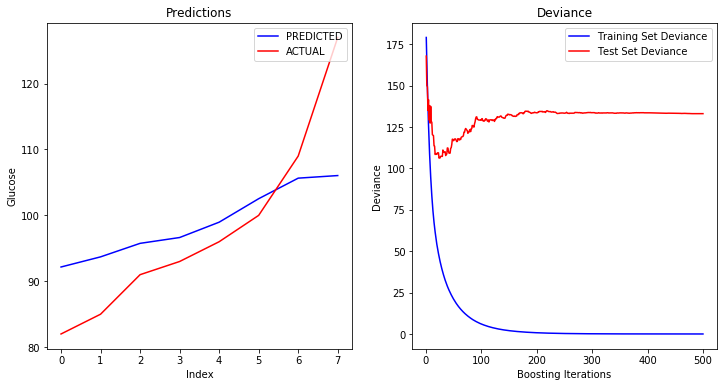

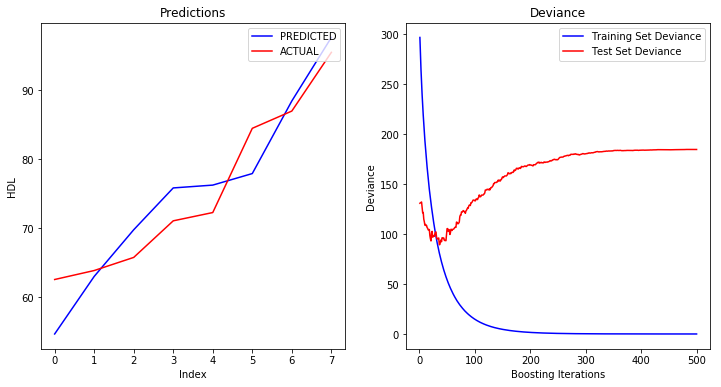

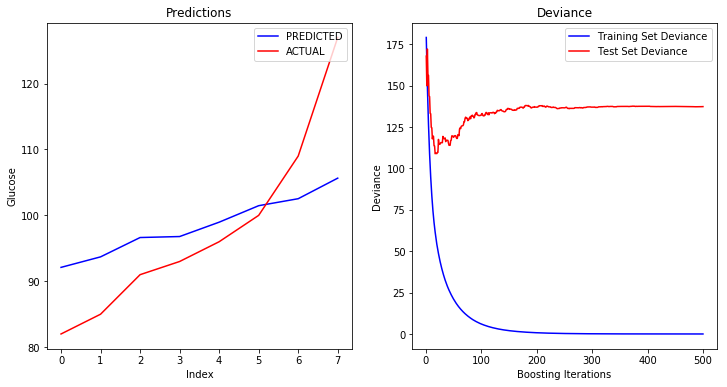

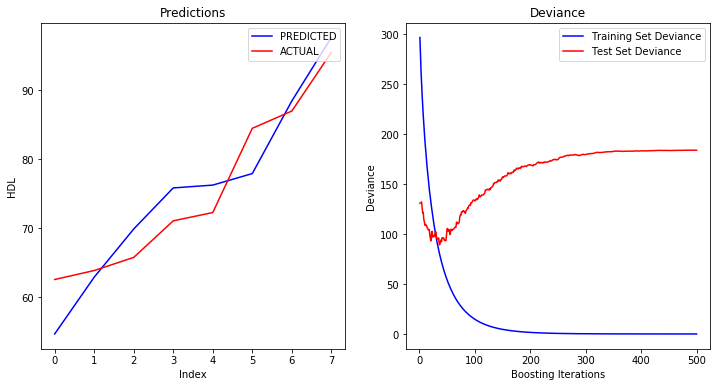

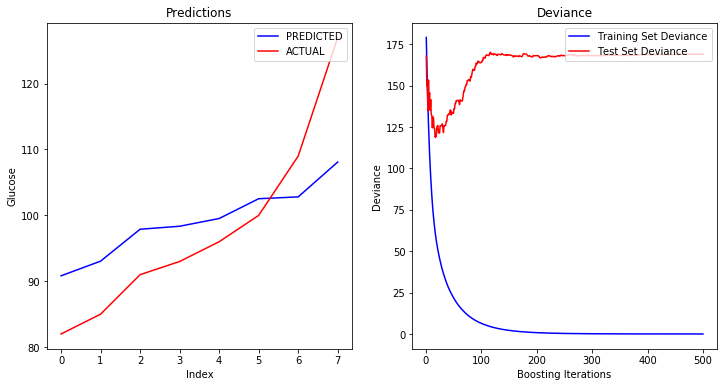

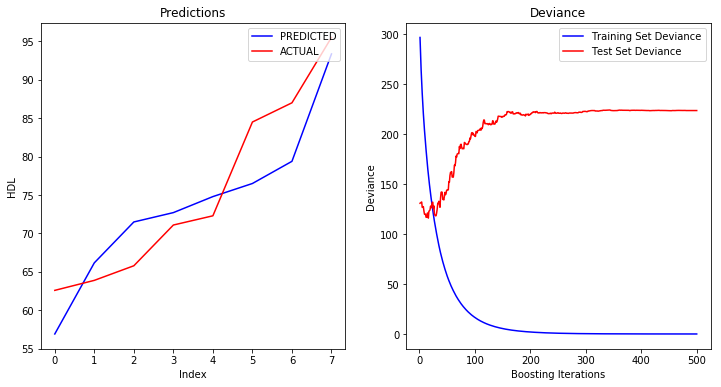

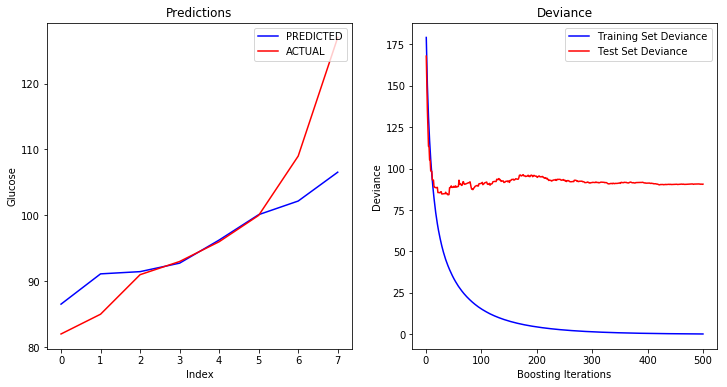

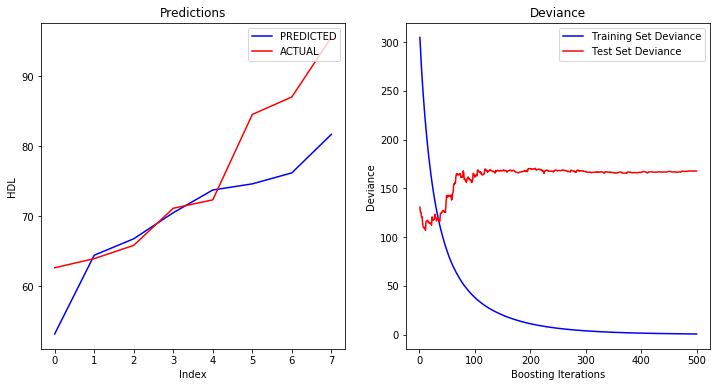

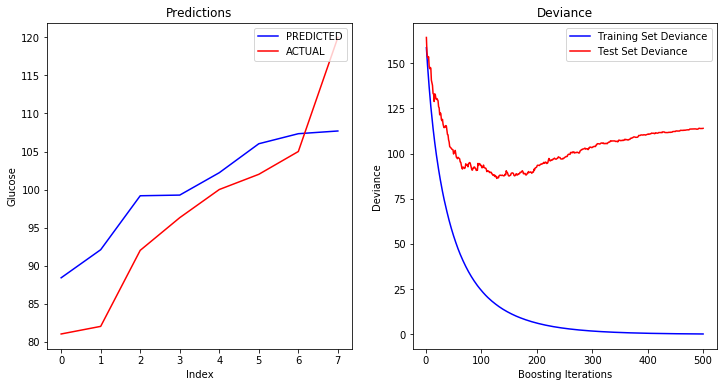

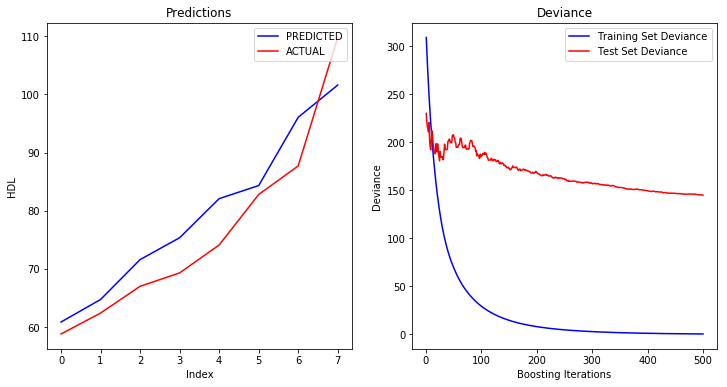

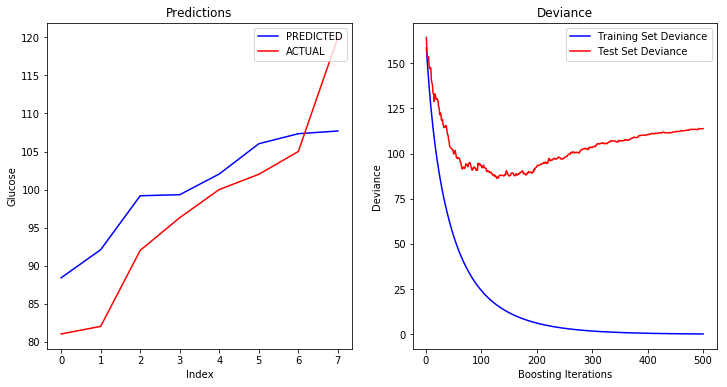

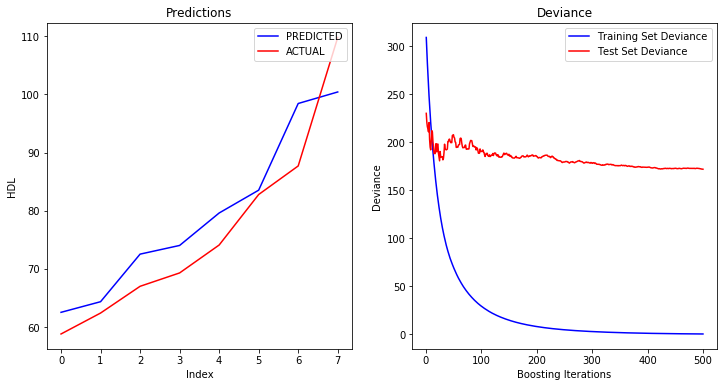

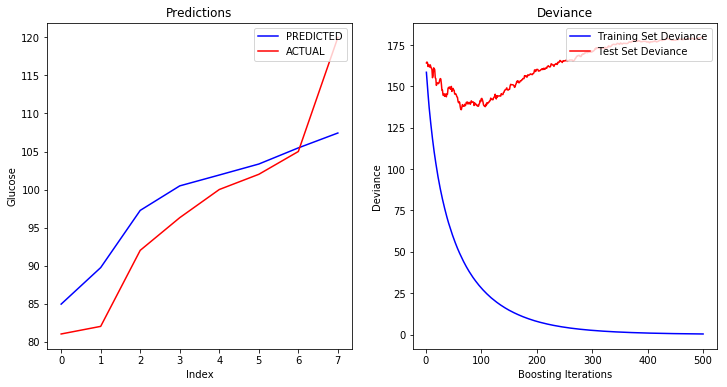

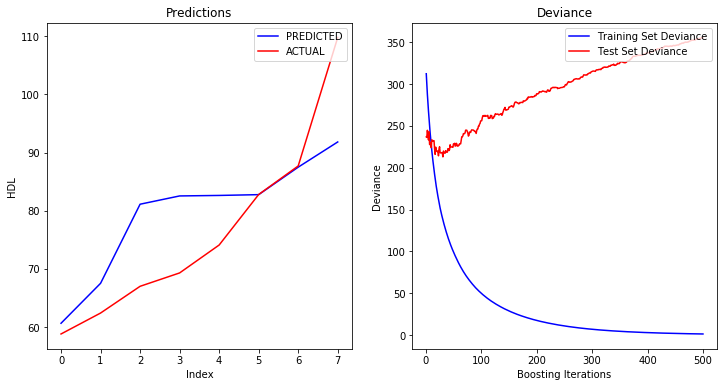

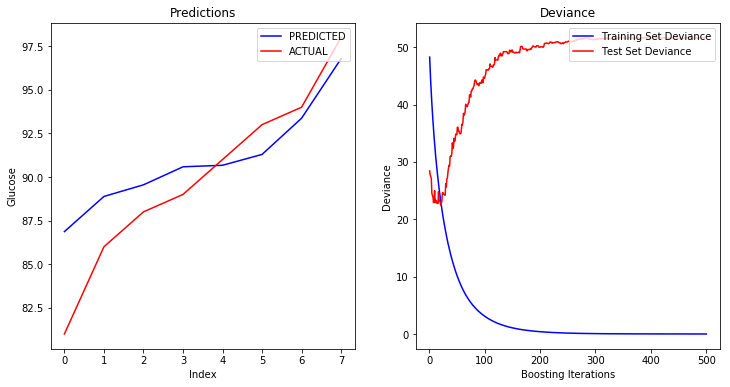

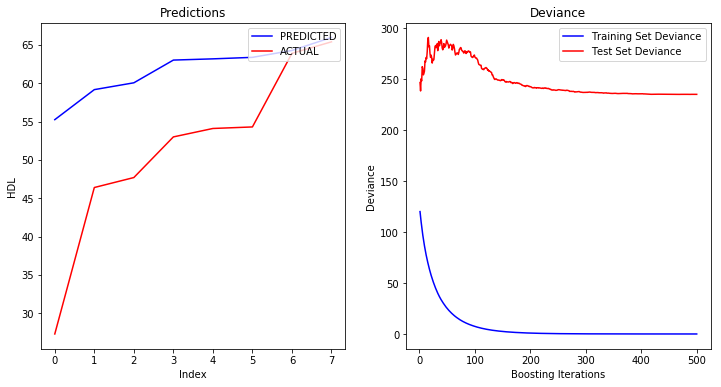

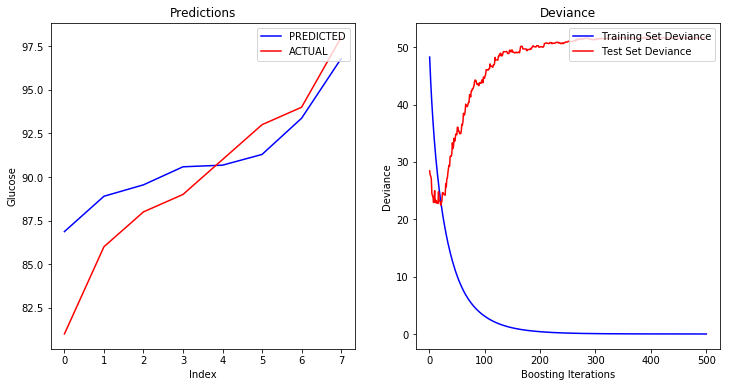

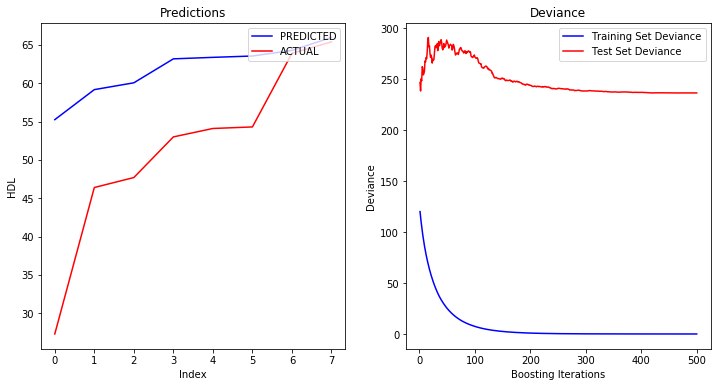

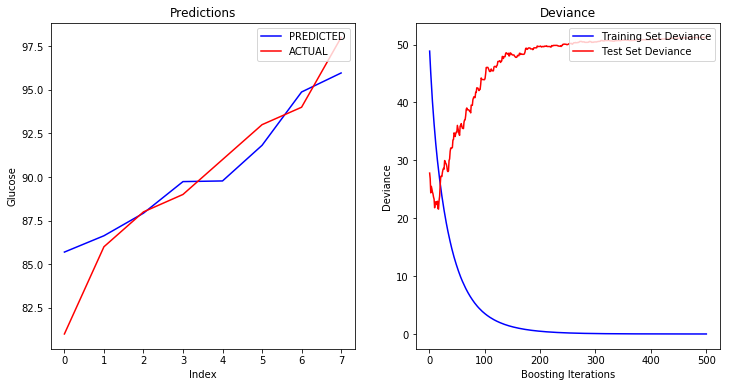

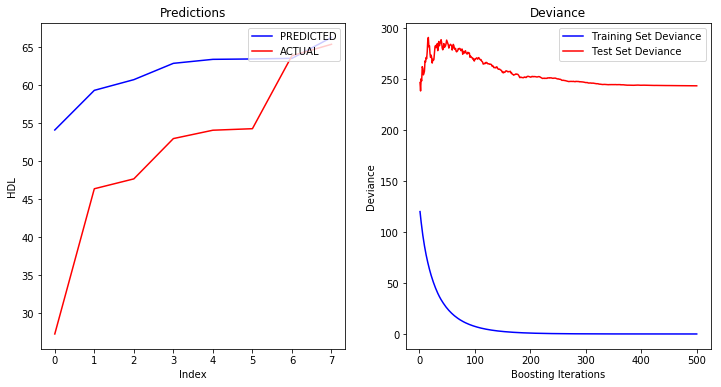

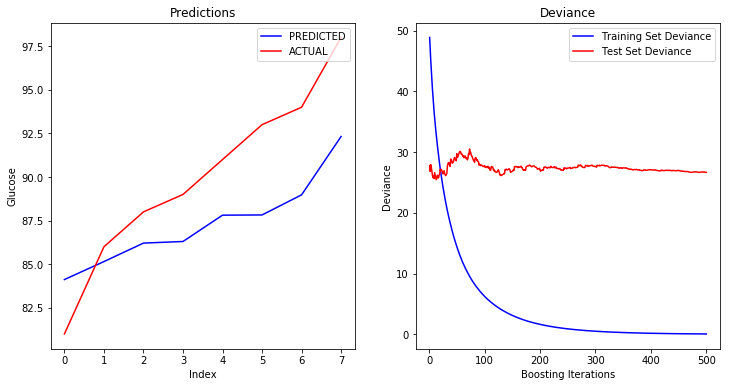

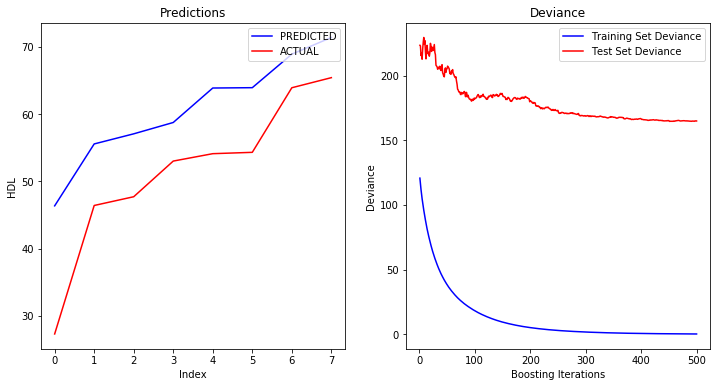

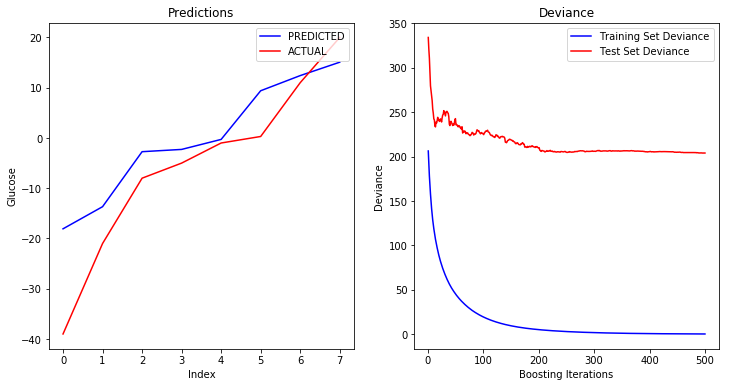

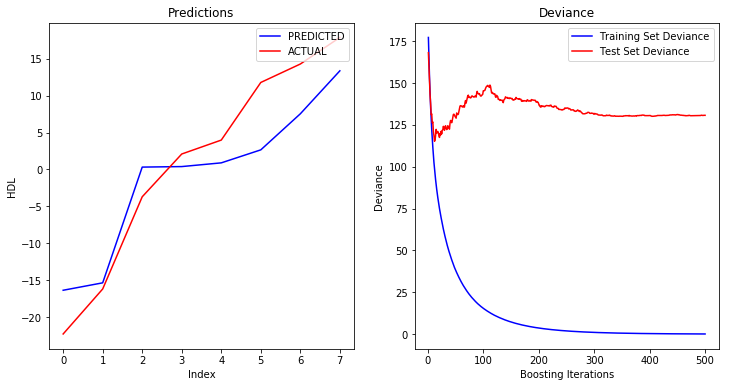

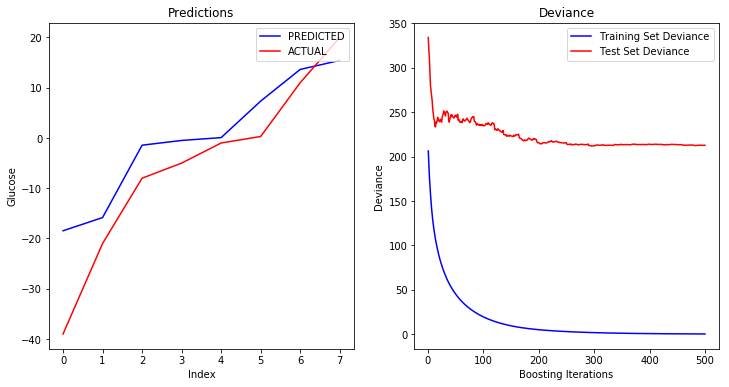

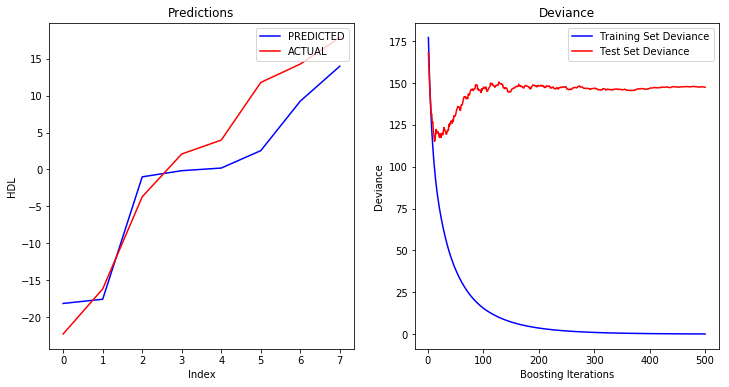

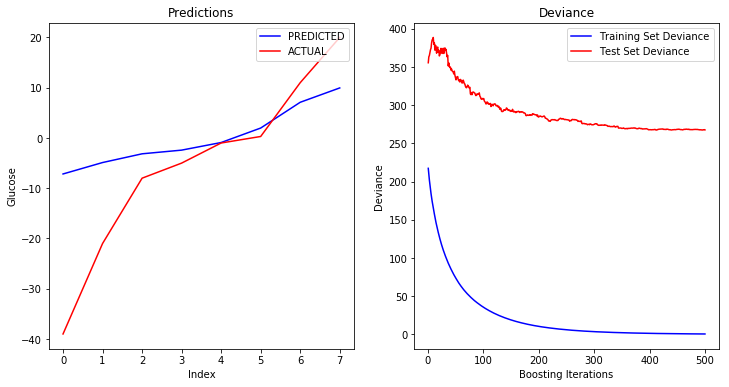

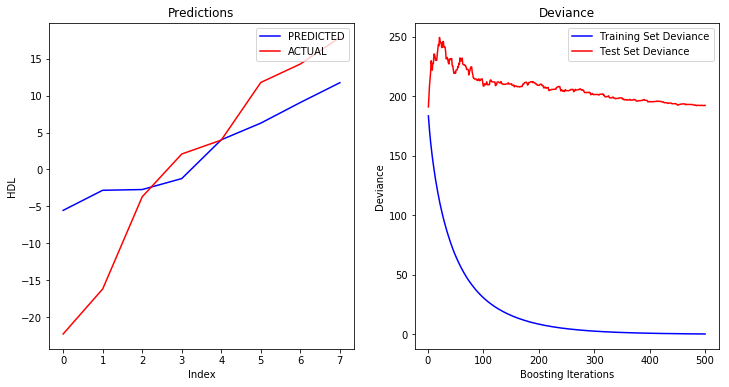

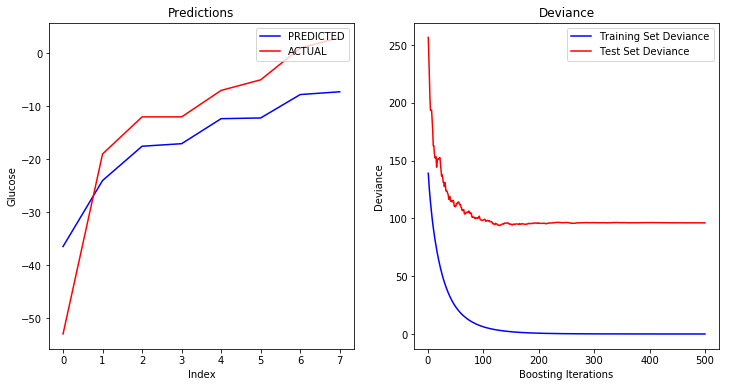

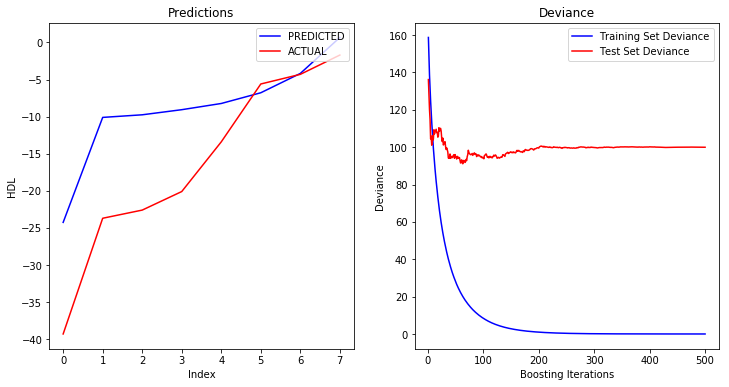

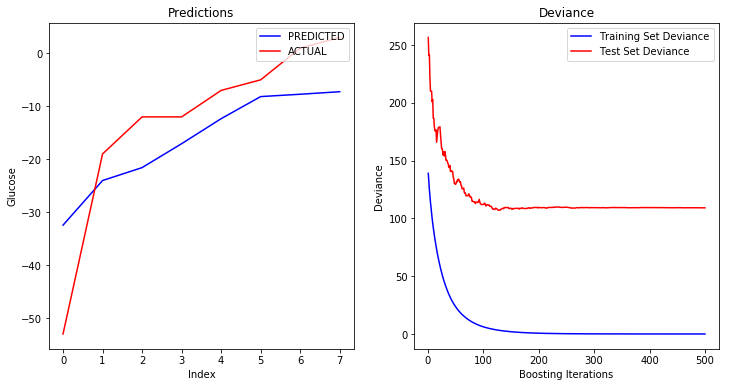

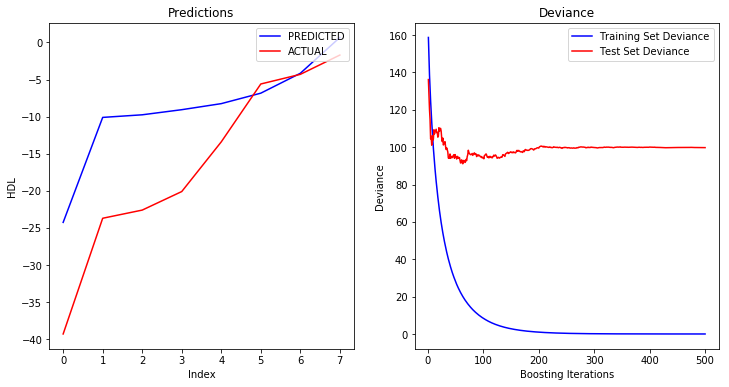

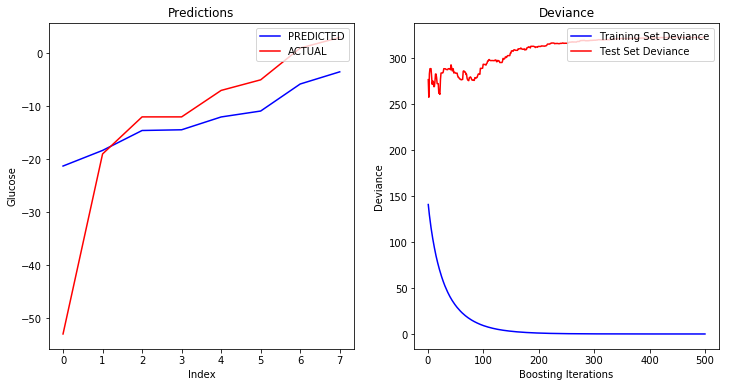

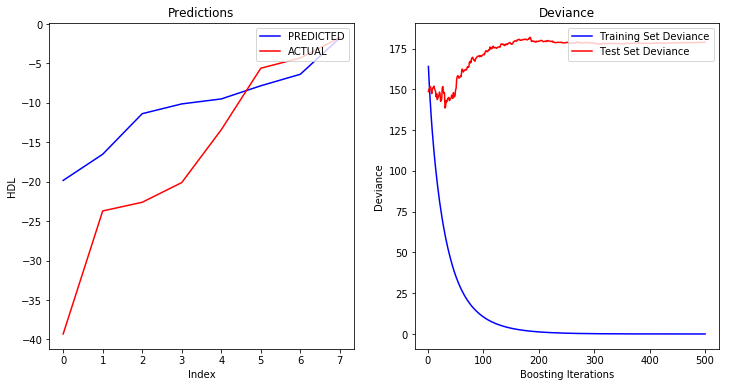

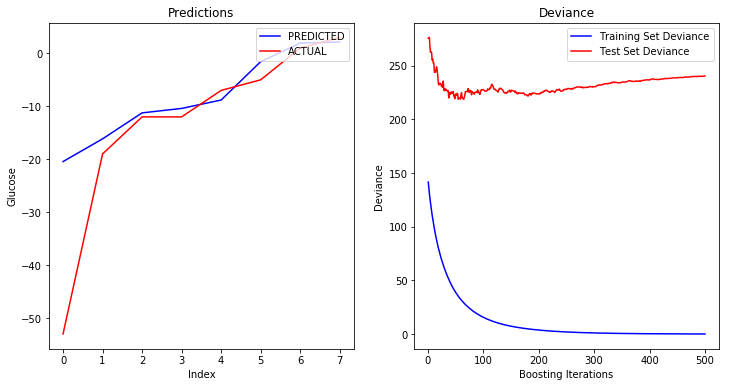

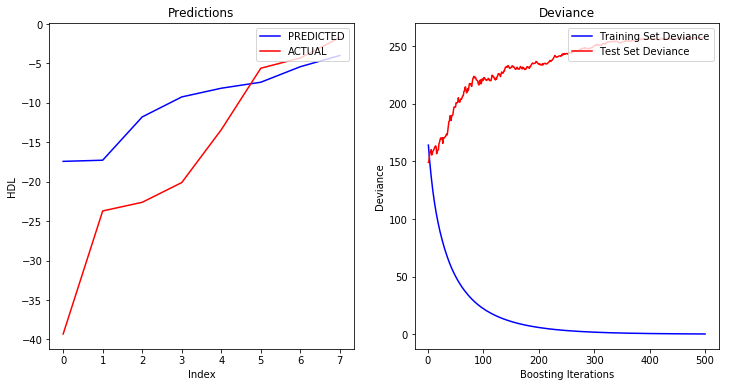

In [29]:
#UwnO
document.add_heading('UwnO', level=1)
dataset = 'UwnO'
extension = 'Images/' + dataset + '/'

document.add_heading('BL',level=2)
week = 'BL'
####################################################################################################################!
####################################################################################################################! BL Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1113 = mse
results1113 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2113 = mse
results2113 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! BL RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1213 = mse
results1213 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2213 = mse
results2213 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! BL RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1313 = mse
results1313 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2313 = mse
results2313 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! BL RBM
document.add_heading('Removed Blood and Microbiome',level=3)
part = 'RBM'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1413 = mse
results1413 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2413 = mse
results2413 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

document.add_heading('W4',level=2)
week = 'W4'
####################################################################################################################!
####################################################################################################################! W4 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1123 = mse
results1123 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL' 
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2123 = mse
results2123 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W4 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1223 = mse
results1223 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2223 = mse
results2223 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W4 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1323 = mse
results1323 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2323 = mse
results2323 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

document.add_heading('W8',level=2)
week = 'W8'
####################################################################################################################!
####################################################################################################################! W8 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1133 = mse
results1133 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2133 = mse
results2133 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W8 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1233= mse
results1233 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2233 = mse
results2233 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W8 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1333 = mse
results1333 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2333 = mse
results2333 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W8 RBM
document.add_heading('Removed Blood and Microbiome',level=3)
part = 'RBM'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1433 = mse
results1433 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2433 = mse
results2433 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

document.add_heading('Delta4',level = 2)
week = 'Delta 4'
####################################################################################################################!
####################################################################################################################! D4 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1143 = mse
results1143 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2143 = mse
results2143 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D4 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1243 = mse
results1243 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2243 = mse
results2243 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D4 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1343 = mse
results1343 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2343 = mse
results2343 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))


document.add_heading('Delta8',level=2)
week = 'Delta 8'
####################################################################################################################!
####################################################################################################################! D8 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1153 = mse
results1153 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2153 = mse
results2153 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D8 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1253 = mse
results1253 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2253 = mse
results2253 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D8 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1353 = mse
results1353 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2353 = mse
results2353 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D8 RBM
document.add_heading('Removed Blood and Microbiome',level=3)
part = 'RBM'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1453 = mse
results1453 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = 'Unstandardized Data no Omics/Data/'+part+ '/'+ target_name+' '+ week+' no Omics.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2453 = mse
results2453 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

MSE: 74.1763
MSE: 105.3736


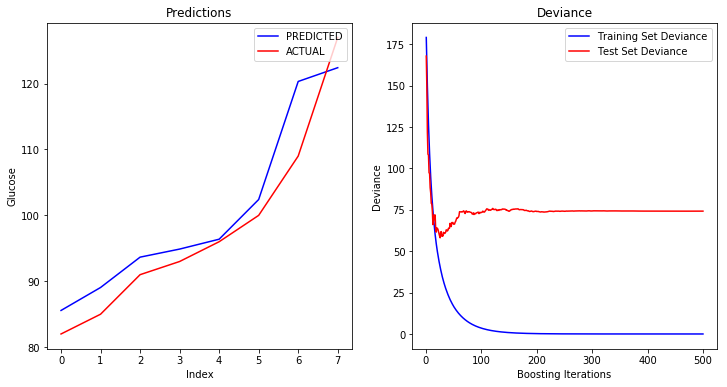

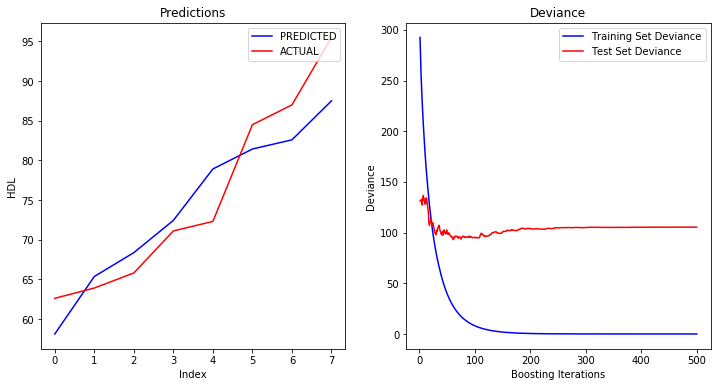

In [25]:
#### UwO
document.add_heading('UwO', level=1)
dataset = 'UwO'
extension = 'Images/' + dataset + '/'
folder = 'Unstandardized Data w Omics'
document.add_heading('BL',level=2)
week = 'BL'
####################################################################################################################!
####################################################################################################################! BL Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1114 = mse
results1114 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' +output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2114 = mse
results2114 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

#### UwO
document.add_heading('UwO', level=1)
dataset = 'UwO'
extension = 'Images/' + dataset + '/'
folder = 'Unstandardized Data w Omics'
document.add_heading('BL',level=2)
week = 'BL'
####################################################################################################################!
####################################################################################################################! BL Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1114 = mse
results1114 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2114 = mse
results2114 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! BL RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1214 = mse
results1214 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2214 = mse
results2214 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! BL RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1314 = mse
results1314 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2314 = mse
results2314 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! BL RBM
document.add_heading('Removed Blood and Microbiome',level=3)
part = 'RBM'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1414 = mse
results1414 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2414 = mse
results2414 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

document.add_heading('W4',level=2)
week = 'W4'
####################################################################################################################!
####################################################################################################################! W4 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1124 = mse
results1124 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL' 
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2124 = mse
results2124 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W4 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1224 = mse
results1224 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2224 = mse
results2224 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W4 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1324 = mse
results1324 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2324 = mse
results2324 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

document.add_heading('W8',level=2)
week = 'W8'
####################################################################################################################!
####################################################################################################################! W8 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1134 = mse
results1134 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2134 = mse
results2134 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W8 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1234 = mse
results1234 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2234 = mse
results2234 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W8 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1334 = mse
results1334 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2334 = mse
results2334 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! W8 RBM
document.add_heading('Removed Blood and Microbiome',level=3)
part = 'RBM'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1434 = mse
results1434 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2434 = mse
results2434 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

document.add_heading('Delta4',level = 2)
week = 'Delta 4'
####################################################################################################################!
####################################################################################################################! D4 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1144 = mse
results1144 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2144 = mse
results2144 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(3))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D4 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1244 = mse
results1244 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2244 = mse
results2244 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D4 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1344 = mse
results1344 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2344 = mse
results2344 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))


document.add_heading('Delta8',level=2)
week = 'Delta 8'
####################################################################################################################!
####################################################################################################################! D8 Raw
document.add_heading('Raw',level=3)
part = 'Raw'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1154 = mse
results1154 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2154 = mse
results2154 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D8 RZ
document.add_heading('Removed Zero Columns',level=3)
part = 'RZ'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1254 = mse
results1254 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2254 = mse
results2254 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D8 RB
document.add_heading('Removed Blood Measurements',level=3)
part = 'RB'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1354 = mse
results1354 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2354 = mse
results2354 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
####################################################################################################################!
####################################################################################################################! D8 RBM
document.add_heading('Removed Blood and Microbiome',level=3)
part = 'RBM'
document.add_heading('Glucose',level=4)
target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse1454 = mse
results1454 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))
document.add_heading('HDL',level=4)
target_name = 'HDL'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'
output_name = part + target_name + week + dataset
mse,results = mse_images(excel_name,target_name,output_name, extension)
mse2454 = mse
results2454 = results
document.add_paragraph('The mse value '+ target_name + ' '+ week +' is '+str(mse))
pic1 = 'Images\\'+ dataset + '\\' + output_name + '.png'
document.add_picture(pic1,width=Inches(5))
table = document.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable Name'
hdr_cells[1].text = 'Importance'
for name, imp in results:
    row_cells = table.add_row().cells  
    row_cells[0].text = name
    row_cells[1].text = str(round(imp,2))

In [30]:
# SAVING DOCUMENT
document.save('Datasets Results.docx')

#Figure 1
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2, 4, 1)
ax2 = fig.add_subplot(2, 4, 2, sharey=ax1)
ax3 = fig.add_subplot(2, 4, 3)
ax4 = fig.add_subplot(2, 4, 4, sharey=ax3)
ax5 = fig.add_subplot(2, 4, 5)
ax6 = fig.add_subplot(2, 4, 6, sharey=ax5)
ax7 = fig.add_subplot(2, 4, 7)
ax8 = fig.add_subplot(2, 4, 8, sharey=ax7)

#MSE FOR Raw
ax1.plot([1,2,3],[mse1114,mse1124,mse1134]) #bl, w4, w8
ax1.plot([1,2],[mse1144,mse1154]) #d4 d8

ax2.plot([1,2,3],[mse2114,mse2124,mse2134]) #bl, w4, w8
ax2.plot([1,2],[mse2144,mse2154]) #d4 d8

#MSE FOR RZ
ax3.plot([1,2,3],[mse1214,mse1224,mse1234]) #bl, w4, w8
ax3.plot([1,2],[mse1244,mse1254]) #d4 d8

ax4.plot([1,2,3],[mse2214,mse2224,mse2234]) #bl, w4, w8
ax4.plot([1,2],[mse2244,mse2254]) #d4 d8

#MSE FOR RB
ax5.plot([1,2,3],[mse1314,mse1324,mse1334]) #bl, w4, w8
ax5.plot([1,2],[mse1344,mse1354]) #d4 d8

ax6.plot([1,2,3],[mse2314,mse2324,mse2334]) #bl, w4, w8
ax6.plot([1,2],[mse2344,mse2354]) #d4 d8

#MSE FOR Rbm
ax7.plot([1,2],[mse1414,mse1434]) #bl, w8
ax7.plot([1],[mse1454],'*') #d8

ax8.plot([1,2],[mse2414,mse2434]) #bl, w8
ax8.plot([1],[mse2454],'*') #d8

#Figure 2
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

#MSE FOR BL
ax1.plot([1,2,3,4],[mse1114,mse1214,mse1314,mse1414],label = 'BL') #raw, rz, rb,rbm  #BLUE
#MSE FOR w4
ax1.plot([1,2,3],[mse1124,mse1224,mse1324],label = 'W4') #raw, rz, rb
#MSE FOR w8
ax1.plot([1,2,3,4],[mse1134,mse1234,mse1334,mse1434],label = 'W8') #raw, rz, rb,rbm
#MSE FOR d4
ax1.plot([1,2,3],[mse1144,mse1244,mse1344],label = 'D4') #raw, rz, rb
#MSE FOR d8
ax1.plot([1,2,3,4],[mse1154,mse1254,mse1354,mse145],label = 'D8') #raw, rz, rb,rbm
ax1.legend(loc='upper right')


ax2.plot([1,2,3,4],[mse2114,mse2214,mse2314,mse2414],label = 'BL') #raw, rz, rb,rbm  #BLUE
#MSE FOR w4
ax2.plot([1,2,3],[mse2124,mse2224,mse2324],label = 'W4') #raw, rz, rb
#MSE FOR w8
ax2.plot([1,2,3,4],[mse2134,mse2234,mse2334,mse2434],label = 'W8') #raw, rz, rb,rbm
#MSE FOR d4
ax2.plot([1,2,3],[mse2144,mse2244,mse2344],label = 'D4') #raw, rz, rb
#MSE FOR d8
ax2.plot([1,2,3,4],[mse2154,mse2254,mse2354,mse2454],label = 'D8') #raw, rz, rb,rbm
ax2.legend(loc='upper right')

#Figure 2
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

#MSE FOR BL
ax1.plot([1,2,3,4],[mse1111,mse1211,mse1311,mse1411],label = 'BL') #raw, rz, rb,rbm  #BLUE
#MSE FOR w4
ax1.plot([1,2,3],[mse1121,mse1221,mse1321],label = 'W4') #raw, rz, rb
#MSE FOR w8
ax1.plot([1,2,3,4],[mse1131,mse1231,mse1331,mse1431],label = 'W8') #raw, rz, rb,rbm
#MSE FOR d4
ax1.plot([1,2,3],[mse1143,mse1243,mse1343],label = 'D4') #raw, rz, rb
#MSE FOR d8
ax1.plot([1,2,3,4],[mse1151,mse1251,mse1351,mse1451],label = 'D8') #raw, rz, rb,rbm
ax1.legend(loc='upper right')


ax2.plot([1,2,3,4],[mse2111,mse2211,mse2311,mse2411],label = 'BL') #raw, rz, rb,rbm  #BLUE
#MSE FOR w4
ax2.plot([1,2,3],[mse2121,mse2221,mse2321],label = 'W4') #raw, rz, rb
#MSE FOR w8
ax2.plot([1,2,3,4],[mse2131,mse2231,mse2331,mse2431],label = 'W8') #raw, rz, rb,rbm
#MSE FOR d4
ax2.plot([1,2,3],[mse2141,mse2241,mse2341],label = 'D4') #raw, rz, rb
#MSE FOR d8
ax2.plot([1,2,3,4],[mse2151,mse2251,mse2351,mse2451],label = 'D8') #raw, rz, rb,rbm
ax2.legend(loc='upper right')

In [ ]:
results2433

In [3]:
dataset = 'UwO'
extension = 'Images/' + dataset + '/'
folder = 'Unstandardized Data w Omics'
week = 'BL'
####################################################################################################################!
####################################################################################################################! BL Raw

part = 'Raw'

target_name = 'Glucose'
#_______________________________________________________________________
excel_name = folder+'/Data/'+part+ '/'+ target_name+' '+ week+' '+dataset+'.xlsx'

In [4]:
excel_name

'Unstandardized Data w Omics/Data/Raw/Glucose BL UwO.xlsx'